In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)


    
    return


In [2]:
#Load the training data
col_names = ['deltaI', 'deltaR', 'avgPeak', 'avgWidth', 'avgProm']
peak_names = ['peak1', 'peak2', 'peak3', 'peak4', 'peak5']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4', 'loc5']
width_names = ['width1', 'width2', 'width3','width4', 'width5']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4', 'prom5']
col_names = col_names + peak_names + locs_names + width_names + prom_names

#data = pd.read_csv('LineCutTrainingData051418.csv', header = None, names = col_names)
data = pd.read_csv('CircleSpec_TrainingData052218.csv', header = None, names = col_names)

#The peak information columns have zeros when there weren't 5 peaks

data.head()

,deltaI,deltaR,avgPeak,avgWidth,avgProm,peak1,peak2,peak3,peak4,peak5,...,width1,width2,width3,width4,width5,prom1,prom2,prom3,prom4,prom5
0,0.81472,-0.147980,3.7784,0.023613,3.4428,6.3222,4.3964,3.5756,3.0917,2.7578,...,0.005797,0.012306,0.019629,0.027299,0.034905,5.9945,4.1450,3.2747,2.7487,2.37850
1,0.12699,-0.136070,2.0179,0.034867,1.2671,3.2828,2.4312,2.0189,1.7828,1.6309,...,0.007826,0.019972,0.031354,0.042821,0.053536,2.2156,1.9758,1.4887,1.1945,0.99615
2,0.63236,-1.417600,6.4649,0.014545,6.2697,11.0230,7.7564,6.0006,5.2122,4.5978,...,0.003441,0.007201,0.012137,0.016728,0.021679,10.8530,7.6110,5.8233,5.0080,4.37060
3,0.27850,-0.711760,7.0035,0.011053,6.3065,9.5299,9.3563,8.0529,6.7353,5.7932,...,0.004308,0.005809,0.008896,0.012827,0.017087,9.3692,9.2463,7.9173,6.5750,5.60870
4,0.95751,-0.055153,3.9100,0.023006,3.5849,6.5612,4.5931,3.7006,3.1781,2.8343,...,0.005641,0.011758,0.019023,0.026668,0.034106,6.2527,4.3485,3.4074,2.8440,2.46470


## Creating the training and testing sets

In [3]:
#Assigning the different columns to new dataframe names

#Target variables
Y1 = pd.DataFrame(data['deltaI']) #just delta I
Y2 = pd.DataFrame(data['deltaR']) # just delta R
Y3 = pd.DataFrame.join(Y1, Y2) # both deltas

#Indicator variables
X1 = data[col_names[2:]] #all variables
X2 = data[col_names[5:]] #not the average variables
X3 = data[col_names[2:5]] #just the average variables

#Splitting into train and test sets

#Random state
rs = 42
#Test size
ts1 = 0.3

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs)


## Linear Regression models

#### Using linear regression from scikit-learn with all variables 


Coefficients: 
               deltaI      deltaR
avgPeak    -0.028931    0.453660
avgWidth   67.031903   73.538385
avgProm    -0.024381   -0.371987
peak1      -0.128793    0.397781
peak2      11.341611   40.862823
peak3      -3.825966  -65.936459
peak4     -29.319711  -22.750365
peak5       2.768871   31.231637
loc1       -5.753711  -32.215581
loc2       25.731524  -35.021020
loc3      -14.771659    9.091362
loc4       12.429248    6.836534
loc5       -5.880864   -6.612210
width1   -149.999838   86.870534
width2    -55.462166   96.066230
width3     90.296946  -20.716014
width4    137.486230  191.524402
width5     66.354955  -18.816454
prom1       0.129782   -0.401233
prom2     -11.339155  -40.869183
prom3       3.832797   65.923860
prom4      29.321152   22.747532
prom5      -2.756037  -31.224976
Mean squared error: 0.028
Variance score: 0.804
Score on test set: 0.805
 
RMSE on test data: 0.12805506281186688 for  Delta I
 
RMSE on test data: 0.19688546828169615 for  Delta R


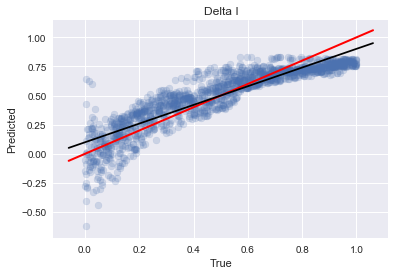

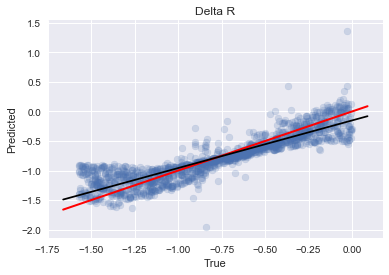

In [4]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg1 = reg.fit(X_1_train, Y_3_train)

#Make predictions using the testing set
y_pred1 = reg1.predict(X_1_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg1.coef_.T, index = X1.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred1))

print('Score on test set: %.3f' % reg1.score(X_1_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred1[:,0], 'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred1[:,1], 'Delta R')

#### Using linear regression from scikit-learn with non-average variables

Coefficients: 
             deltaI      deltaR
peak1    -0.125107    0.570081
peak2    10.913368   39.187500
peak3    -6.063938  -64.362929
peak4   -34.068322  -26.709869
peak5    10.219866   37.674412
loc1     12.960060  -26.042971
loc2     21.858525  -30.310542
loc3     -8.736618   -2.535357
loc4      9.500718   14.387192
loc5     -6.157850   -7.738831
width1 -182.659281   96.404281
width2  -47.819989   97.478391
width3  122.761114   25.518905
width4  161.750907  176.031137
width5   65.945987  -25.232330
prom1     0.119184   -0.566709
prom2   -10.918245  -39.181793
prom3     6.061695   64.366303
prom4    34.066509   26.712197
prom5   -10.218160  -37.645714
Mean squared error: 0.031
Variance score: 0.783
Score on test set: 0.784
 
RMSE on test data: 0.13449445732844428 for  Delta I
 
RMSE on test data: 0.20752449416293506 for  Delta R


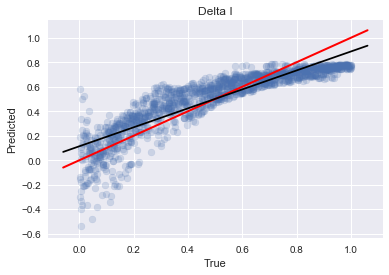

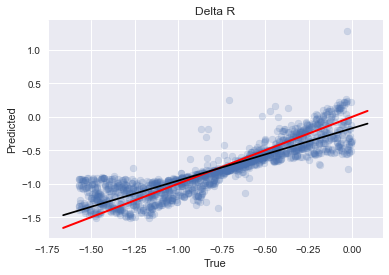

In [5]:
#Initialize and fit model to training data
reg2 = linear_model.LinearRegression()
reg2.fit(X_2_train, Y_3_train)

#Make predictions using the testing set
y_pred2 = reg2.predict(X_2_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg2.coef_.T, index = X2.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred2))

print('Score on test set: %.3f' % reg2.score(X_2_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred2[:,0],'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred2[:,1], 'Delta R')

In [6]:
y_pred2 = reg2.predict(X_2_test)
print(r2_score(Y_3_test, y_pred2))
print(reg2.score(X_2_test, Y_3_test))

#It is odd that these numbers are different. -- I'm pretty sure they should be the same. 


0.7831005616970717
0.7839896797039431


#### Using linear regression from scikit-learn with only average variables

Coefficients: 
             deltaI     deltaR
avgPeak  -0.633879   0.706622
avgWidth -8.697151  48.383857
avgProm   0.567770  -0.676880
Mean squared error: 0.062
Variance score: 0.523
Score on test set: 0.562
 
RMSE on test data: 0.21720564326821476 for  Delta I
 
RMSE on test data: 0.27714249180361605 for  Delta R


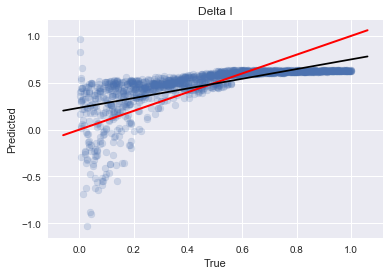

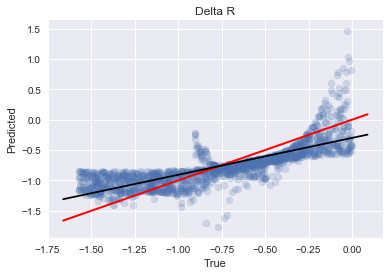

In [7]:
#Initialize and fit model to training data
reg3 = linear_model.LinearRegression()
reg3.fit(X_3_train, Y_3_train)

#Make predictions using the testing set
y_pred3 = reg3.predict(X_3_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg3.coef_.T, index = X3.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred3))

print('Score on test set: %.3f' % reg3.score(X_3_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred3[:,0],'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred3[:,1], 'Delta R')


#### Using statsmodels on (X1, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2903.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:35:09   Log-Likelihood:                 2233.2
No. Observations:                3500   AIC:                            -4420.
Df Residuals:                    3477   BIC:                            -4279.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak       -0.0452      0.019     -2.408      0.0

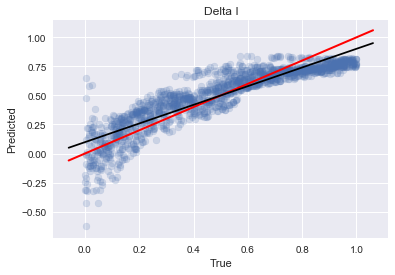

In [8]:
#Initialize and fit OLS model for deltaI 
model1 = sm.OLS(Y_1_train, X_1_train)
results1 = model1.fit()

#Make predictions on testing data
predictions1 = results1.predict(X_1_test) # make the predictions by the model

print(results1.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_1_test['deltaI'], predictions1,'Delta I')


#### Using statsmodels on (X1, Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     2651.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:35:09   Log-Likelihood:                 507.40
No. Observations:                3500   AIC:                            -968.8
Df Residuals:                    3477   BIC:                            -827.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak        0.5376      0.031     17.481      0.0

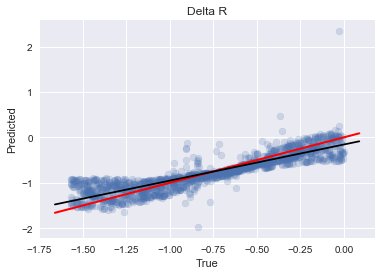

In [9]:
#Initialize and fit OLS model for deltaR 
model1a = sm.OLS(Y_2_train, X_1_train)
results1a = model1a.fit()

#Make predictions on testing data
predictions1a = results1a.predict(X_1_test) # make the predictions by the model

print(results1a.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_2_test['deltaR'], predictions1a,'Delta R')
print(' ')#spacing out the text
print('Sum of absolute residuals:', results1a.resid.abs().sum())
print('Sum of squared residuals:' , results1a.ssr)
print('R Squared, on training data:', results1a.rsquared)

print('RMSE on test data:', np.sqrt(mean_squared_error(Y_2_test, predictions1a)))
print('RMSE on training data:', np.sqrt(mean_squared_error(Y_2_train, results1a.predict(X_1_train))))

#### Using statsmodels on (X2, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2728.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:35:09   Log-Likelihood:                 1897.6
No. Observations:                3500   AIC:                            -3755.
Df Residuals:                    3480   BIC:                            -3632.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
peak1         -0.1039      0.036     -2.852      0.0

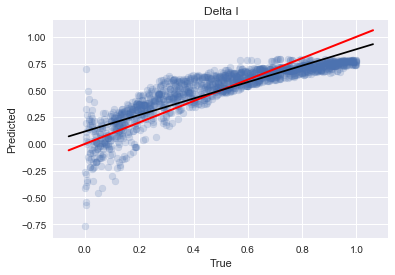

In [10]:
#Initialize and fit OLS model for deltaI 
model2 = sm.OLS(Y_1_train, X_2_train)
results2 = model2.fit()

#Make predictions on testing data
predictions2 = results2.predict(X_2_test) # make the predictions by the model

print(results2.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_1_test['deltaI'], predictions2,'Delta I')


#### Using statsmodels with (X2,Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2740.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:35:10   Log-Likelihood:                 330.05
No. Observations:                3500   AIC:                            -620.1
Df Residuals:                    3480   BIC:                            -496.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
peak1          0.5314      0.057      9.322      0.0

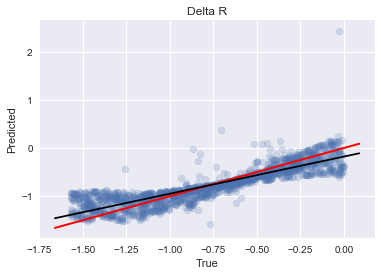

In [11]:
#Initialize and fit OLS model for deltaR 
model2a = sm.OLS(Y_2_train, X_2_train)
results2a = model2a.fit()

#Make predictions on testing data
predictions2a = results2a.predict(X_2_test) # make the predictions by the model

print(results2a.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_2_test['deltaR'], predictions2a,'Delta R')


#### Using statsmodels on (X3, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4004.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:35:10   Log-Likelihood:                -420.43
No. Observations:                3500   AIC:                             846.9
Df Residuals:                    3497   BIC:                             865.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak       -0.5204      0.024    -22.025      0.0

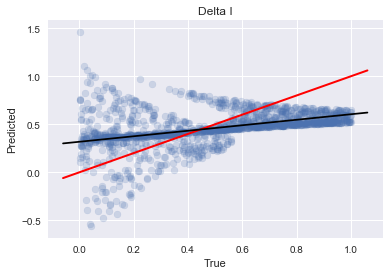

In [12]:
#Initialize and fit OLS model for deltaI 
model3 = sm.OLS(Y_1_train, X_3_train)
results3 = model3.fit()

#Make predictions on testing data
predictions3 = results3.predict(X_3_test) # make the predictions by the model

print(results3.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plotSummary(Y_1_test['deltaI'], predictions3,'Delta I')


#### Using statsmodels on (X3, Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     4837.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:35:10   Log-Likelihood:                -1733.7
No. Observations:                3500   AIC:                             3473.
Df Residuals:                    3497   BIC:                             3492.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak        0.5276      0.034     15.343      0.0

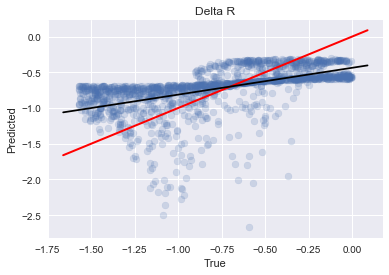

In [13]:
#Initialize and fit OLS model for deltaR 
model3a = sm.OLS(Y_2_train, X_3_train)
results3a = model3a.fit()

#Make predictions on testing data
predictions3a = results3a.predict(X_3_test) # make the predictions by the model

print(results3a.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_2_test['deltaR'], predictions3a,'Delta R')


#### Statsmodels GLM (generalized linear models) with (X1, Y1)

               Results: Generalized linear model
Model:              GLM              AIC:            -4420.3971 
Link Function:      identity         BIC:            -28316.9234
Dependent Variable: deltaI           Log-Likelihood: 2233.2     
Date:               2018-05-23 10:35 LL-Null:        -4881.0    
No. Observations:   3500             Deviance:       57.199     
Df Model:           22               Pearson chi2:   57.2       
Df Residuals:       3477             Scale:          0.016451   
Method:             IRLS                                        
----------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
avgPeak     -0.0452   0.0188  -2.4084 0.0160   -0.0820   -0.0084
avgWidth    71.7967   3.2752  21.9211 0.0000   65.3774   78.2160
avgProm     -0.0086   0.0177  -0.4865 0.6266   -0.0433    0.0261
peak1       -0.1082   0.0349  -3.0969 0.0

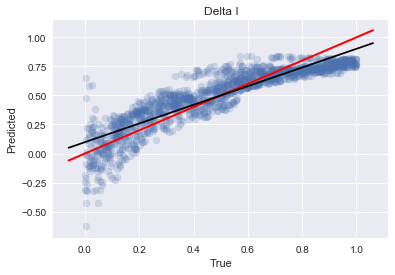

In [14]:
#Initialize and fit GLM model for deltaI 
model4 = sm.GLM(Y_1_train,X_1_train)
results4 = model4.fit()

#Make predictions on testing data
predictions4 = results4.predict(X_1_test)

print(results4.summary2())

#Plot results

plotSummary(Y_1_test['deltaI'], predictions4,'Delta I')


#### Statsmodels GLM with (X1, Y2)

               Results: Generalized linear model
Model:              GLM              AIC:            -968.7991  
Link Function:      identity         BIC:            -28220.7757
Dependent Variable: deltaR           Log-Likelihood: 507.40     
Date:               2018-05-23 10:35 LL-Null:        -5915.1    
No. Observations:   3500             Deviance:       153.35     
Df Model:           22               Pearson chi2:   153.       
Df Residuals:       3477             Scale:          0.044103   
Method:             IRLS                                        
----------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
----------------------------------------------------------------
avgPeak       0.5376   0.0308  17.4815 0.0000    0.4773   0.5979
avgWidth     49.0068   5.3627   9.1384 0.0000   38.4960  59.5176
avgProm      -0.4531   0.0290 -15.6203 0.0000   -0.5100  -0.3963
peak1         0.2917   0.0572   5.0998 0.

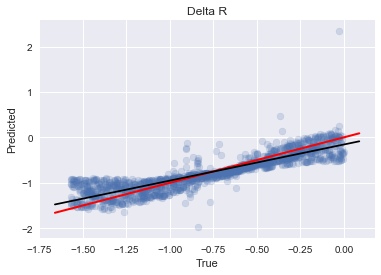

In [15]:
#Initialize and fit GLM model for deltaR
model4a = sm.GLM(Y_2_train,X_1_train)
results4a = model4a.fit()

#Make predictions on testing data
predictions4a = results4a.predict(X_1_test)

print(results4a.summary2())

#Plot results

plotSummary(Y_2_test['deltaR'], predictions4a,'Delta R')


#### Statsmodels GLM with (X2, Y1)

               Results: Generalized linear model
Model:              GLM              AIC:            -3755.1797 
Link Function:      identity         BIC:            -28329.3133
Dependent Variable: deltaI           Log-Likelihood: 1897.6     
Date:               2018-05-23 10:35 LL-Null:        -3676.5    
No. Observations:   3500             Deviance:       69.290     
Df Model:           19               Pearson chi2:   69.3       
Df Residuals:       3480             Scale:          0.019911   
Method:             IRLS                                        
----------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
peak1       -0.1039   0.0364  -2.8521 0.0043   -0.1753   -0.0325
peak2       13.2408   1.9978   6.6278 0.0000    9.3253   17.1564
peak3      -12.0846   4.6227  -2.6142 0.0089  -21.1450   -3.0242
peak4      -32.3367   4.5853  -7.0523 0.0

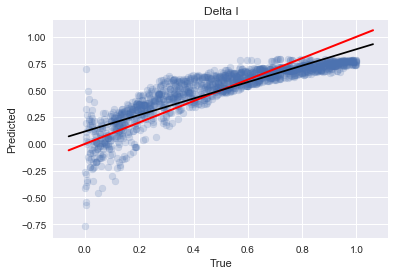

In [16]:
#Initialize and fit GLM model for deltaI
model5 = sm.GLM(Y_1_train,X_2_train)
results5 = model5.fit()

#Make predictions on testing data
predictions5 = results5.predict(X_2_test)

print(results5.summary2())

#Plot results
plotSummary(Y_1_test['deltaI'], predictions5,'Delta I')




#### Statsmodels GLM with (X2, Y2)

               Results: Generalized linear model
Model:              GLM              AIC:            -620.1000  
Link Function:      identity         BIC:            -28228.9020
Dependent Variable: deltaR           Log-Likelihood: 330.05     
Date:               2018-05-23 11:25 LL-Null:        -5310.8    
No. Observations:   3500             Deviance:       169.70     
Df Model:           19               Pearson chi2:   170.       
Df Residuals:       3480             Scale:          0.048765   
Method:             IRLS                                        
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
peak1      0.5314    0.0570    9.3216  0.0000    0.4197    0.6432
peak2     34.9454    3.1265   11.1773  0.0000   28.8177   41.0731
peak3    -53.3896    7.2345   -7.3799  0.0000  -67.5689  -39.2103
peak4    -29.8660    7.1759   -4.16

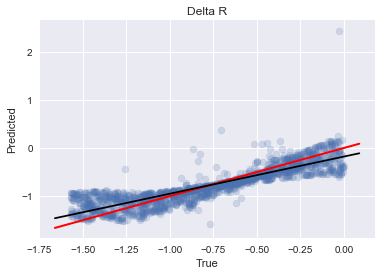

In [34]:
#Initialize and fit GLM model for deltaR
model5a = sm.GLM(Y_2_train,X_2_train)
results5a = model5a.fit()

#Make predictions on testing data
predictions5a = results5a.predict(X_2_test)

print(results5a.summary2())

#Plot results

plotSummary(Y_2_test['deltaR'], predictions5a,'Delta R')



               Results: Generalized linear model
Model:              GLM              AIC:            846.8503   
Link Function:      identity         BIC:            -28276.7590
Dependent Variable: deltaI           Log-Likelihood: -420.43    
Date:               2018-05-23 11:25 LL-Null:        -626.36    
No. Observations:   3500             Deviance:       260.57     
Df Model:           2                Pearson chi2:   261.       
Df Residuals:       3497             Scale:          0.074513   
Method:             IRLS                                        
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
avgPeak     -0.5204    0.0236  -22.0245  0.0000  -0.5667  -0.4741
avgWidth    33.4786    0.5196   64.4336  0.0000  32.4602  34.4969
avgProm      0.5339    0.0238   22.4635  0.0000   0.4874   0.5805

 
RMSE on test data: 0.27366797825

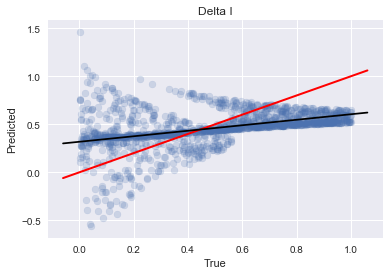

In [36]:
#Initialize and fit GLM model for deltaI
model6a = sm.GLM(Y_1_train,X_3_train)
results6a = model6a.fit()

#Make predictions on testing data
predictions6a = results6a.predict(X_3_test)

print(results6a.summary2())

#Plot results

plotSummary(Y_1_test['deltaI'], predictions6a,'Delta I')

               Results: Generalized linear model
Model:              GLM              AIC:            3473.4832  
Link Function:      identity         BIC:            -27985.4413
Dependent Variable: deltaR           Log-Likelihood: -1733.7    
Date:               2018-05-23 11:26 LL-Null:        -2265.9    
No. Observations:   3500             Deviance:       551.89     
Df Model:           2                Pearson chi2:   552.       
Df Residuals:       3497             Scale:          0.15782    
Method:             IRLS                                        
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
avgPeak        0.5276   0.0344  15.3433 0.0000   0.4602   0.5950
avgWidth     -18.1546   0.7562 -24.0088 0.0000 -19.6367 -16.6725
avgProm       -0.6235   0.0346 -18.0246 0.0000  -0.6913  -0.5557

 
RMSE on test data: 0.3936428158957072 

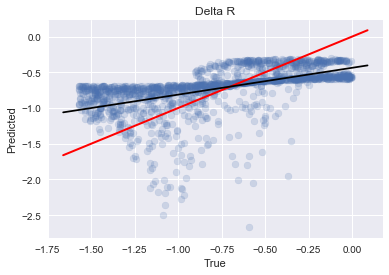

In [37]:
#Initialize and fit GLM model for deltaR
model7a = sm.GLM(Y_2_train,X_3_train)
results7a = model7a.fit()

#Make predictions on testing data
predictions7a = results7a.predict(X_3_test)

print(results7a.summary2())

#Plot results

plotSummary(Y_2_test['deltaR'], predictions7a,'Delta R')

## Decision Tree Models
#### Using Decision Trees in scikit-learn to predict deltaI and deltaR simultaneously

#### Using (X1, Y3)

             Regr 1     Regr 2     Regr 3
avgPeak    0.000520   0.000728   0.000492
avgWidth   0.026286   0.028408   0.026657
avgProm    0.478500   0.479075   0.478466
peak1      0.000910   0.002617   0.005008
peak2      0.000454   0.001586   0.002154
peak3      0.001300   0.000947   0.000469
peak4      0.012141   0.004469   0.015979
peak5      0.000276   0.001714   0.000392
loc1       0.073697   0.073681   0.073681
loc2       0.142826   0.142784   0.142777
loc3       0.021122   0.021300   0.021165
loc4       0.005817   0.005786   0.005839
loc5       0.058099   0.058006   0.058016
width1     0.002725   0.003263   0.003373
width2     0.006326   0.005335   0.005162
width3     0.093864   0.092537   0.093080
width4     0.043099   0.041364   0.040819
width5     0.008614   0.009416   0.012185
prom1      0.014161   0.013195   0.010137
prom2      0.000435   0.000556   0.000258
prom3      0.000197   0.000308   0.000878
prom4      0.005514   0.011998   0.000202
prom5      0.003115   0.000927   0

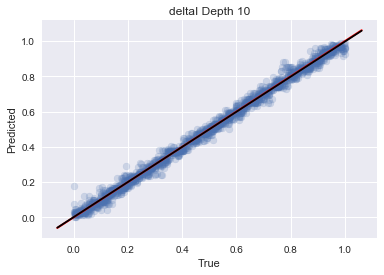

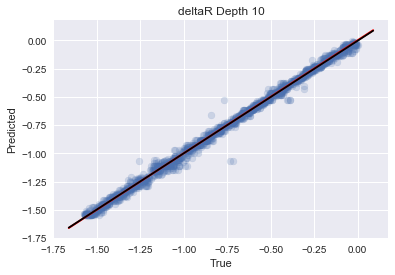

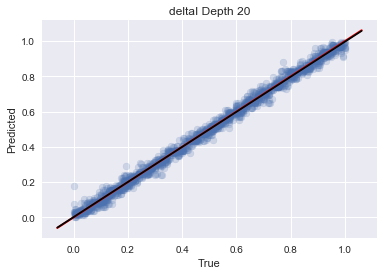

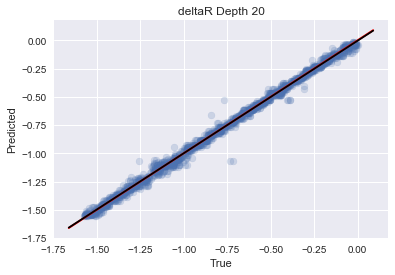

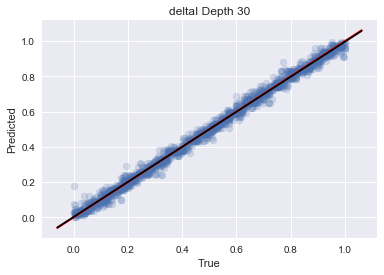

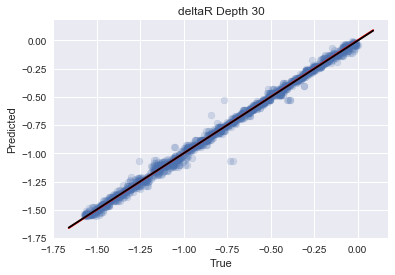

In [18]:
#Initialize the models with various max depths
regr_1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3 = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1.fit(X_1_train, Y_3_train)
regr_2.fit(X_1_train, Y_3_train)
regr_3.fit(X_1_train, Y_3_train)


#Print the coefficients or importances

data1 = pd.DataFrame(regr_1.feature_importances_.T, columns = ['Regr 1']) 

data1['Regr 2'] = pd.Series(regr_2.feature_importances_.T)
data1['Regr 3'] = pd.Series(regr_3.feature_importances_.T)
data1.index = X_1_train.columns
test1 = np.array([regr_1.max_depth, regr_2.max_depth, regr_3.max_depth]).reshape(1,3)
model_info = pd.DataFrame(test1, columns = data1.columns, index = ['MaxDepth'])
data1 = data1.append(model_info)
print(data1)


#Use model to predict
y_1 = regr_1.predict(X_1_test)
y_2 = regr_2.predict(X_1_test)
y_3 = regr_3.predict(X_1_test)

#Plot results
s = 25
plotSummary(Y_3_test['deltaI'], y_1[:,0], 'deltaI Depth 10')
plotSummary(Y_3_test['deltaR'], y_1[:,1], 'deltaR Depth 10')

plotSummary(Y_3_test['deltaI'], y_2[:,0], 'deltaI Depth 20')
plotSummary(Y_3_test['deltaR'], y_2[:,1], 'deltaR Depth 20')

plotSummary(Y_3_test['deltaI'], y_3[:,0], 'deltaI Depth 30')
plotSummary(Y_3_test['deltaR'], y_3[:,1], 'deltaR Depth 30')
print(' ')

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1.score(X_1_test,Y_3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2.score(X_1_test,Y_3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3.score(X_1_test,Y_3_test),', using max depth of 30')



regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X1, Y3, cv=10))

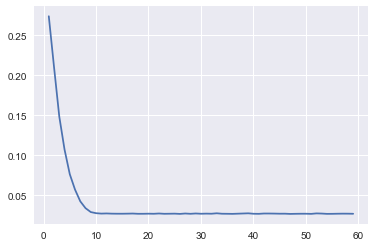

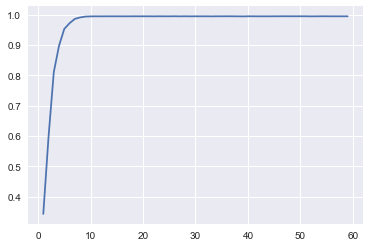

In [19]:
#Determining optimal max_depth - should be at the bend 
rmse_test = []
R2_test = []
for i in range(1,60):
    
    regressor_test = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    regressor_test = regressor_test.fit(X_1_train, Y_3_train)
    true = Y_3_test
    predicted = regressor_test.predict(X_1_test)

    rmse_test.append(np.sqrt(mean_squared_error(true, predicted)))
    R2_test.append(r2_score(true, predicted))
    

index1 = [i for i in range(1,60)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

             Regr 1     Regr 2     Regr 3
avgWidth   0.030100   0.030892   0.030090
avgProm    0.481337   0.480986   0.481033
peak4      0.014209   0.018689   0.017229
loc1       0.073170   0.073104   0.073104
loc2       0.143145   0.143026   0.143016
loc3       0.025359   0.025378   0.025336
loc5       0.060282   0.060261   0.060239
width3     0.096262   0.096594   0.096275
width4     0.056758   0.052530   0.053921
prom1      0.019379   0.018541   0.019758
MaxDepth  10.000000  20.000000  30.000000
 
RMSE on test data: 0.025886360920117212 for  deltaI Depth 10
 
RMSE on test data: 0.03982843624615706 for  deltaR Depth 10
 
RMSE on test data: 0.025255942319753397 for  deltaI Depth 20
 
RMSE on test data: 0.038264289743272256 for  deltaR Depth 20
 
RMSE on test data: 0.0253597445972838 for  deltaI Depth 30
 
RMSE on test data: 0.03846167785271481 for  deltaR Depth 30
 
Regression 1 Score:  0.9920299889534849 , using max depth of 10
Regression 2 Score:  0.9925753186098186 , using max dept

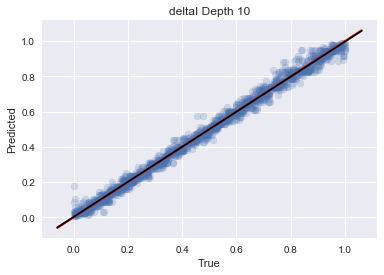

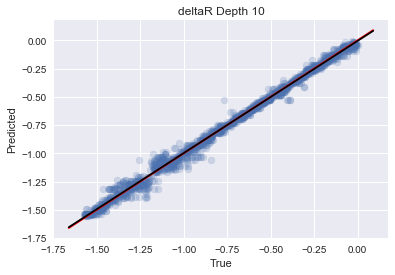

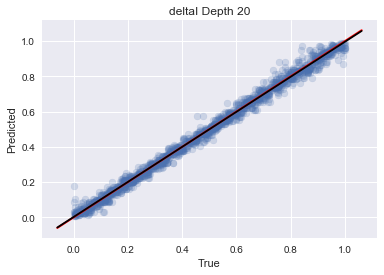

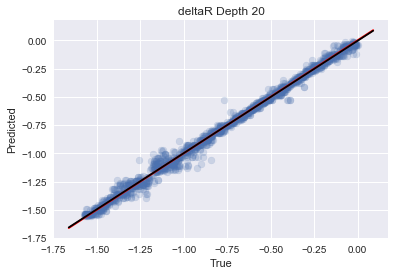

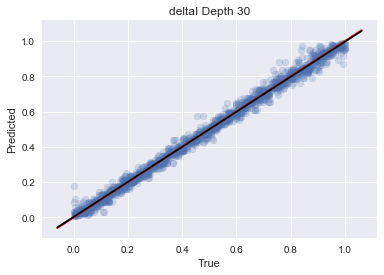

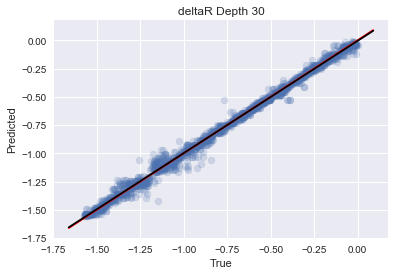

In [20]:
#Initialize the models with various max depths
regr_1a = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2a = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3a = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Removing some features from the previous model 
new_index = data1[data1['Regr 1']>0.01].drop('MaxDepth', axis = 0).index
X_1a_train = X_1_train[new_index]
X_1a_test = X_1_test[new_index]
X1a = X1[new_index]

#Fit the models
regr_1a.fit(X_1a_train, Y_3_train)
regr_2a.fit(X_1a_train, Y_3_train)
regr_3a.fit(X_1a_train, Y_3_train)


#Print the coefficients or importances

data1a = pd.DataFrame(regr_1a.feature_importances_.T, columns = ['Regr 1']) 

data1a['Regr 2'] = pd.Series(regr_2a.feature_importances_.T)
data1a['Regr 3'] = pd.Series(regr_3a.feature_importances_.T)
data1a.index = X_1a_train.columns
test1a = np.array([regr_1a.max_depth, regr_2a.max_depth, regr_3a.max_depth]).reshape(1,3)
model_infoa = pd.DataFrame(test1a, columns = data1a.columns, index = ['MaxDepth'])
data1a = data1a.append(model_infoa)
print(data1a)


#Use model to predict
y_1a = regr_1a.predict(X_1a_test)
y_2a = regr_2a.predict(X_1a_test)
y_3a = regr_3a.predict(X_1a_test)

#Plot results
s = 25
plotSummary(Y_3_test['deltaI'], y_1a[:,0], 'deltaI Depth 10')
plotSummary(Y_3_test['deltaR'], y_1a[:,1], 'deltaR Depth 10')

plotSummary(Y_3_test['deltaI'], y_2a[:,0], 'deltaI Depth 20')
plotSummary(Y_3_test['deltaR'], y_2a[:,1], 'deltaR Depth 20')

plotSummary(Y_3_test['deltaI'], y_3a[:,0], 'deltaI Depth 30')
plotSummary(Y_3_test['deltaR'], y_3a[:,1], 'deltaR Depth 30')
print(' ')

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1a.score(X_1a_test,Y_3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2a.score(X_1a_test,Y_3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3a.score(X_1a_test,Y_3_test),', using max depth of 30')



regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X1a, Y3, cv=10))

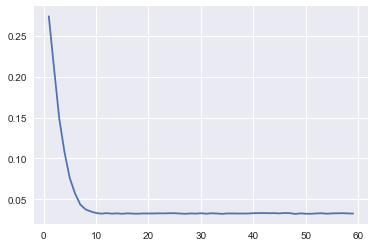

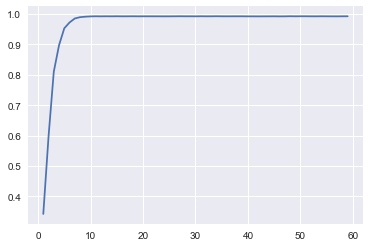

In [21]:
#Determining optimal max_depth - should be at the bend 
rmse_test = []
R2_test = []
for i in range(1,60):
    
    regressor_test = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    regressor_test = regressor_test.fit(X_1a_train, Y_3_train)
    true = Y_3_test
    predicted = regressor_test.predict(X_1a_test)

    rmse_test.append(np.sqrt(mean_squared_error(true, predicted)))
    R2_test.append(r2_score(true, predicted))
    

index1 = [i for i in range(1,60)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

#### Using (X2,Y3)

             Regr 1     Regr 2     Regr 3
peak1      0.002031   0.002337   0.001151
peak2      0.001416   0.001597   0.000970
peak3      0.000347   0.000222   0.001554
peak4      0.005482   0.008110   0.012334
peak5      0.050043   0.008456   0.042189
loc1       0.076823   0.076808   0.077310
loc2       0.160467   0.160934   0.160414
loc3       0.015667   0.015672   0.015781
loc4       0.007730   0.008130   0.007893
loc5       0.056254   0.055347   0.055585
width1     0.007589   0.008182   0.007983
width2     0.001628   0.002318   0.002406
width3     0.102448   0.102105   0.102724
width4     0.004744   0.007121   0.005096
width5     0.481277   0.483523   0.482924
prom1      0.010478   0.009223   0.009960
prom2      0.000607   0.000530   0.000954
prom3      0.003813   0.001465   0.003280
prom4      0.008741   0.005923   0.001088
prom5      0.002414   0.041996   0.008403
MaxDepth  10.000000  20.000000  30.000000
 
RMSE on test data: 0.023181382236729806 for  deltaI Depth 10
 
RMSE on tes

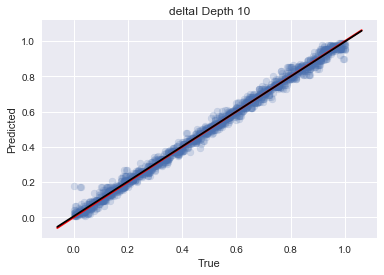

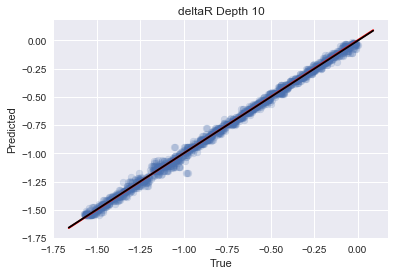

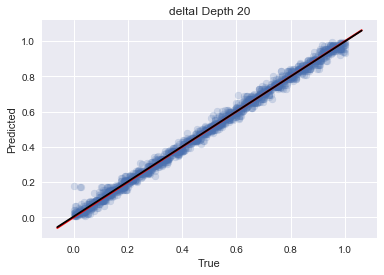

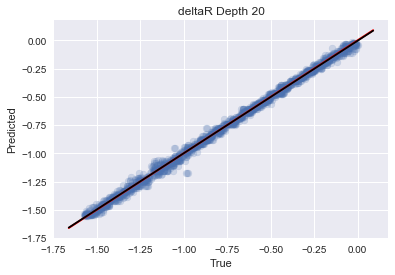

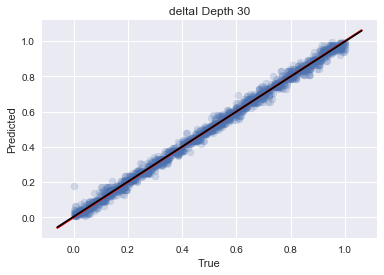

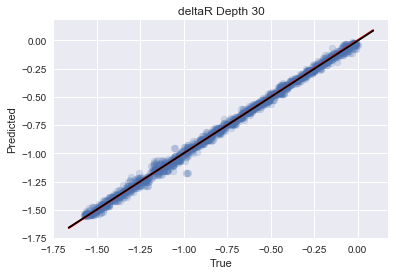

In [22]:
#Initialize the models with various max depths
regr_4 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_5 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_6 = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)


#Fit the models
regr_4.fit(X_2_train, Y_3_train)
regr_5.fit(X_2_train, Y_3_train)
regr_6.fit(X_2_train, Y_3_train)


#Print the coefficients or importances

data2 = pd.DataFrame(regr_4.feature_importances_.T, columns = ['Regr 1']) 

data2['Regr 2'] = pd.Series(regr_5.feature_importances_.T)
data2['Regr 3'] = pd.Series(regr_6.feature_importances_.T)
data2.index = X_2_train.columns
test2 = np.array([regr_4.max_depth, regr_5.max_depth, regr_6.max_depth]).reshape(1,3)
model_info2 = pd.DataFrame(test2, columns = data2.columns, index = ['MaxDepth'])
data2 = data2.append(model_info2)
print(data2)


#Use model to predict
y_4 = regr_4.predict(X_2_test)
y_5 = regr_5.predict(X_2_test)
y_6 = regr_6.predict(X_2_test)

#Plot results
s = 25
plotSummary(Y_3_test['deltaI'], y_4[:,0], 'deltaI Depth 10')
plotSummary(Y_3_test['deltaR'], y_4[:,1], 'deltaR Depth 10')

plotSummary(Y_3_test['deltaI'], y_5[:,0], 'deltaI Depth 20')
plotSummary(Y_3_test['deltaR'], y_5[:,1], 'deltaR Depth 20')

plotSummary(Y_3_test['deltaI'], y_6[:,0], 'deltaI Depth 30')
plotSummary(Y_3_test['deltaR'], y_6[:,1], 'deltaR Depth 30')
print(' ')

#Trying to understand the scoring
print('Regression 1 Score: ', regr_4.score(X_2_test,Y_3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_5.score(X_2_test,Y_3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_6.score(X_2_test,Y_3_test),', using max depth of 30')



regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X2, Y3, cv=10))

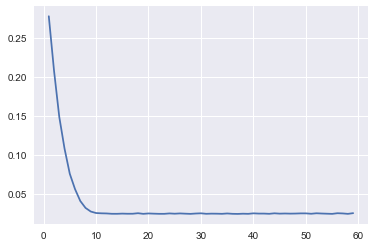

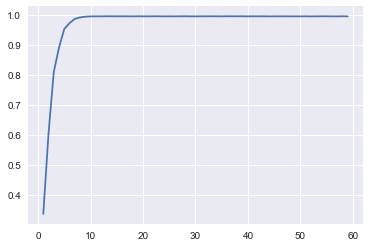

In [23]:
#Determining optimal max_depth - should be at the bend 
rmse_test = []
R2_test = []
for i in range(1,60):
    
    regressor_test = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    regressor_test = regressor_test.fit(X_2_train, Y_3_train)
    true = Y_3_test
    predicted = regressor_test.predict(X_2_test)

    rmse_test.append(np.sqrt(mean_squared_error(true, predicted)))
    R2_test.append(r2_score(true, predicted))
    

index1 = [i for i in range(1,60)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

#### Using (X3, Y3)

             Regr 1     Regr 2     Regr 3
avgPeak    0.168176   0.178095   0.177878
avgWidth   0.145358   0.155271   0.155272
avgProm    0.686466   0.666635   0.666850
MaxDepth  10.000000  20.000000  30.000000
 
RMSE on test data: 0.11292560317633137 for  deltaI Depth 10
 
RMSE on test data: 0.17728597109398156 for  deltaR Depth 10
 
RMSE on test data: 0.10423876468099895 for  deltaI Depth 20
 
RMSE on test data: 0.17362339599161813 for  deltaR Depth 20
 
RMSE on test data: 0.10418853269949795 for  deltaI Depth 30
 
RMSE on test data: 0.1731269795912175 for  deltaR Depth 30
 
Regression 1 Score:  0.8439399835413205 , using max depth of 10
Regression 2 Score:  0.8551429722580336 , using max depth of 20
Regression 3 Score:  0.8557879541291685 , using max depth of 30
Cross Validation Scores for regressor with max depth of  30  :  [0.83026213 0.8615527  0.87726637 0.89527508 0.85988923 0.8616994
 0.84945786 0.87046016 0.83689026 0.86560444]


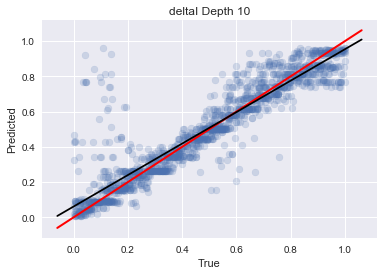

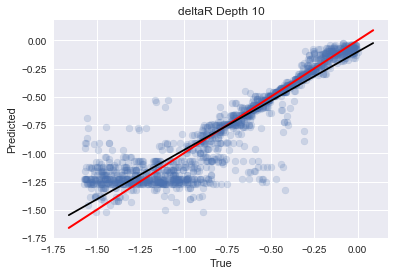

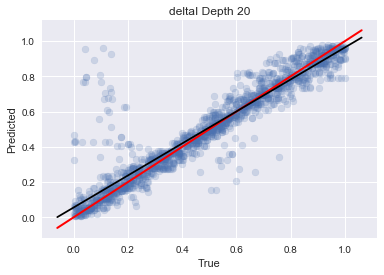

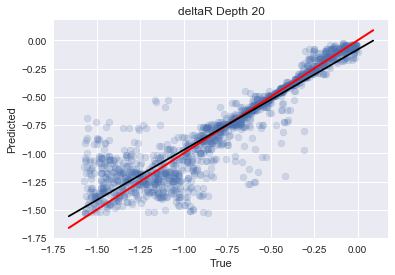

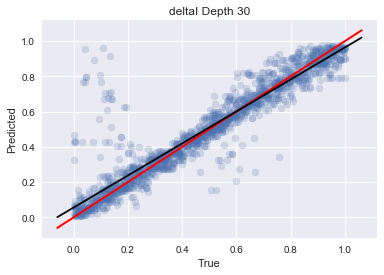

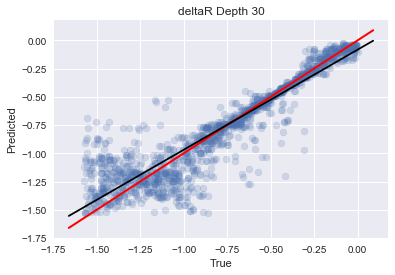

In [24]:
#Initialize the models with various max depths
regr_7 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_8 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_9 = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)


#Fit the models
regr_7.fit(X_3_train, Y_3_train)
regr_8.fit(X_3_train, Y_3_train)
regr_9.fit(X_3_train, Y_3_train)


#Print the coefficients or importances

data3 = pd.DataFrame(regr_7.feature_importances_.T, columns = ['Regr 1']) 

data3['Regr 2'] = pd.Series(regr_8.feature_importances_.T)
data3['Regr 3'] = pd.Series(regr_9.feature_importances_.T)
data3.index = X_3_train.columns
test3 = np.array([regr_7.max_depth, regr_8.max_depth, regr_9.max_depth]).reshape(1,3)
model_info3 = pd.DataFrame(test3, columns = data3.columns, index = ['MaxDepth'])
data3 = data3.append(model_info3)
print(data3)


#Use model to predict
y_7 = regr_7.predict(X_3_test)
y_8 = regr_8.predict(X_3_test)
y_9 = regr_9.predict(X_3_test)

#Plot results
s = 25
plotSummary(Y_3_test['deltaI'], y_7[:,0], 'deltaI Depth 10')
plotSummary(Y_3_test['deltaR'], y_7[:,1], 'deltaR Depth 10')

plotSummary(Y_3_test['deltaI'], y_8[:,0], 'deltaI Depth 20')
plotSummary(Y_3_test['deltaR'], y_8[:,1], 'deltaR Depth 20')

plotSummary(Y_3_test['deltaI'], y_9[:,0], 'deltaI Depth 30')
plotSummary(Y_3_test['deltaR'], y_9[:,1], 'deltaR Depth 30')
print(' ')

#Trying to understand the scoring
print('Regression 1 Score: ', regr_7.score(X_3_test,Y_3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_8.score(X_3_test,Y_3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_9.score(X_3_test,Y_3_test),', using max depth of 30')



regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X3, Y3, cv=10))

## Random Forest

Feature Importances:
           depth 6   depth 8  depth 10
avgPeak   0.000452  0.001790  0.001753
avgWidth  0.017133  0.018001  0.017930
avgProm   0.486327  0.478753  0.477531
peak1     0.004355  0.004508  0.003633
peak2     0.000972  0.001132  0.001362
peak3     0.014891  0.003134  0.003543
peak4     0.008229  0.013741  0.013764
peak5     0.019965  0.005458  0.011481
loc1      0.068665  0.067814  0.067494
loc2      0.116675  0.115301  0.115110
loc3      0.032521  0.032774  0.032807
loc4      0.006658  0.008134  0.008009
loc5      0.076316  0.076188  0.075887
width1    0.002823  0.003895  0.004239
width2    0.010243  0.011536  0.011642
width3    0.071325  0.070906  0.070600
width4    0.010762  0.012273  0.015685
width5    0.028494  0.029126  0.028019
prom1     0.006795  0.007711  0.008593
prom2     0.000308  0.001061  0.000974
prom3     0.001892  0.014629  0.010390
prom4     0.011139  0.004622  0.006466
prom5     0.003060  0.017514  0.013086
 
RMSE on test data: 0.044843792448727236 f

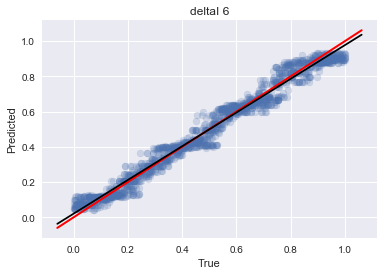

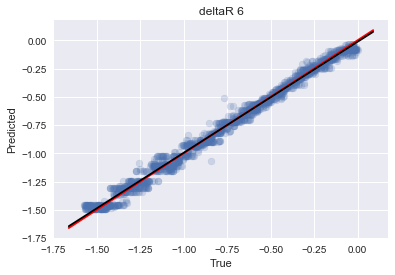

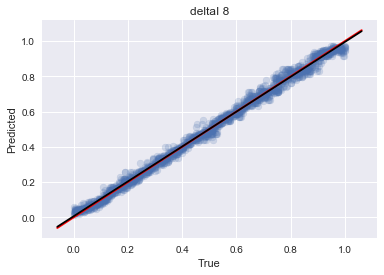

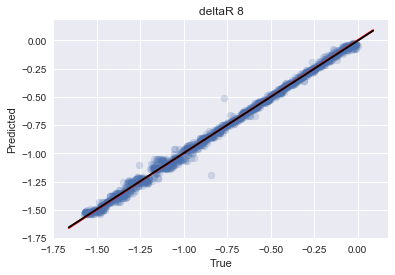

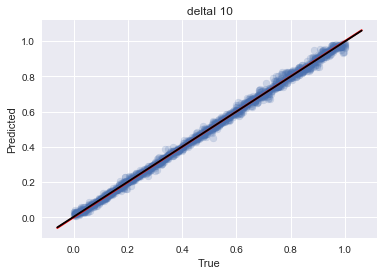

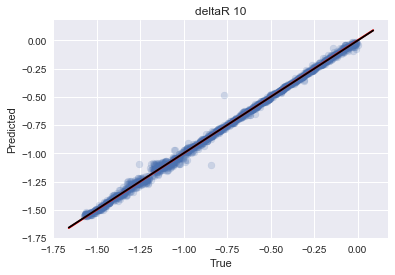

In [25]:
rs = 42
regr_rf = RandomForestRegressor(max_depth = 6,  random_state=rs)
regr_rf2 = RandomForestRegressor(max_depth = 8,  random_state=rs)
regr_rf3 = RandomForestRegressor(max_depth = 10,  random_state=rs)
regr_rf.fit(X_1_train, Y_3_train)
regr_rf2.fit(X_1_train, Y_3_train)
regr_rf3.fit(X_1_train, Y_3_train)


predict_rf = regr_rf.predict(X_1_test)
predict_rf2 = regr_rf2.predict(X_1_test)
predict_rf3 = regr_rf3.predict(X_1_test)

#print('Score: ', regr_rf.score(X_1_test, Y_3_test))

importance_rf_6 = pd.Series(regr_rf.feature_importances_, index= X_1_train.columns)
importance_rf_8 = pd.Series(regr_rf2.feature_importances_, index= X_1_train.columns)
importance_rf_10 = pd.Series(regr_rf3.feature_importances_, index = X_1_train.columns)
importance_rf = pd.concat([importance_rf_6, importance_rf_8, importance_rf_10], axis = 1)
importance_rf.columns = ['depth 6', 'depth 8', 'depth 10']

print('Feature Importances:' )
print(importance_rf)


plotSummary(Y_3_test['deltaI'], predict_rf[:,0], 'deltaI 6')
plotSummary(Y_3_test['deltaR'], predict_rf[:,1], 'deltaR 6')

plotSummary(Y_3_test['deltaI'], predict_rf2[:,0], 'deltaI 8')
plotSummary(Y_3_test['deltaR'], predict_rf2[:,1], 'deltaR 8')

plotSummary(Y_3_test['deltaI'], predict_rf3[:,0], 'deltaI 10')
plotSummary(Y_3_test['deltaR'], predict_rf3[:,1], 'deltaR 10')

In [26]:
new_features = importance_rf[importance_rf['depth 10']>0.01].index

Feature Importances:
           depth 6   depth 8  depth 10
avgWidth  0.016203  0.016204  0.018583
avgProm   0.497030  0.490785  0.488824
peak4     0.018124  0.017966  0.019542
peak5     0.006634  0.012065  0.011090
loc1      0.068753  0.067853  0.067670
loc2      0.117661  0.116445  0.116021
loc3      0.034483  0.035342  0.035078
loc5      0.080867  0.081226  0.081005
width2    0.011931  0.014622  0.015088
width3    0.071273  0.071285  0.071697
width4    0.016068  0.017270  0.016908
width5    0.030377  0.032628  0.030200
prom3     0.012375  0.013805  0.014732
prom5     0.018220  0.012505  0.013562
 
RMSE on test data: 0.0459082092595057 for  deltaI 6
 
RMSE on test data: 0.04892177576507334 for  deltaR 6
 
RMSE on test data: 0.022579018476492213 for  deltaI 8
 
RMSE on test data: 0.03513459549477904 for  deltaR 8
 
RMSE on test data: 0.017108420934548892 for  deltaI 10
 
RMSE on test data: 0.027354086102755998 for  deltaR 10


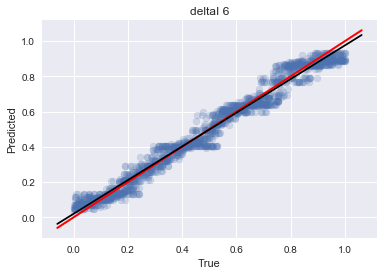

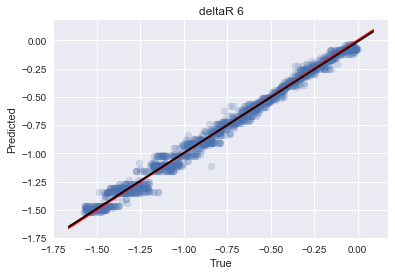

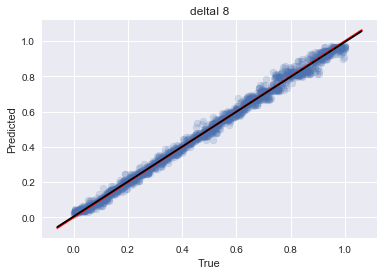

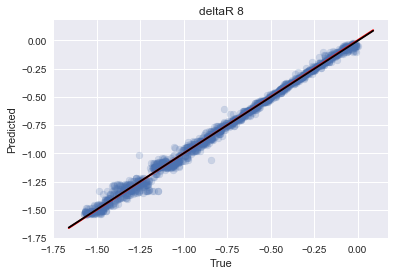

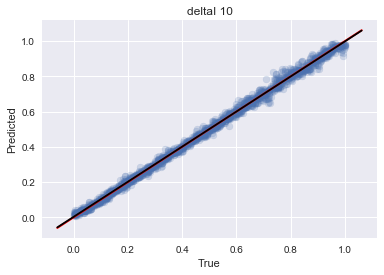

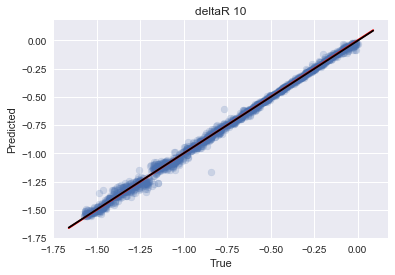

In [27]:
#Removing a couple features that had an "importance" less than 0.01

X_new1_train = X_1_train[new_features]
X_new1_test = X_1_test[new_features]

rs = 42
regr_rfn = RandomForestRegressor(max_depth = 6,  random_state=rs)
regr_rfn2 = RandomForestRegressor(max_depth = 8,  random_state=rs)
regr_rfn3 = RandomForestRegressor(max_depth = 10,  random_state=rs)
regr_rfn.fit(X_new1_train, Y_3_train)
regr_rfn2.fit(X_new1_train, Y_3_train)
regr_rfn3.fit(X_new1_train, Y_3_train)


predict_rfn = regr_rfn.predict(X_new1_test)
predict_rfn2 = regr_rfn2.predict(X_new1_test)
predict_rfn3 = regr_rfn3.predict(X_new1_test)

#print('Score: ', regr_rf.score(X_1_test, Y_3_test))

importance_rfn_6 = pd.Series(regr_rfn.feature_importances_, index= X_new1_train.columns)
importance_rfn_8 = pd.Series(regr_rfn2.feature_importances_, index= X_new1_train.columns)
importance_rfn_10 = pd.Series(regr_rfn3.feature_importances_, index = X_new1_train.columns)
importance_rfn = pd.concat([importance_rfn_6, importance_rfn_8, importance_rfn_10], axis = 1)
importance_rfn.columns = ['depth 6', 'depth 8', 'depth 10']

print('Feature Importances:' )
print(importance_rfn)


plotSummary(Y_3_test['deltaI'], predict_rfn[:,0], 'deltaI 6')
plotSummary(Y_3_test['deltaR'], predict_rfn[:,1], 'deltaR 6')

plotSummary(Y_3_test['deltaI'], predict_rfn2[:,0], 'deltaI 8')
plotSummary(Y_3_test['deltaR'], predict_rfn2[:,1], 'deltaR 8')

plotSummary(Y_3_test['deltaI'], predict_rfn3[:,0], 'deltaI 10')
plotSummary(Y_3_test['deltaR'], predict_rfn3[:,1], 'deltaR 10')


## Neural Network


 
RMSE on test data: 0.03268277664303577 for  deltaI
 
RMSE on test data: 0.04933793319437046 for  deltaR
R^2 score:  0.987463335084863
R^2 score delta I: 0.9870657866186504
R^2 score delta R:  0.9878608835510756


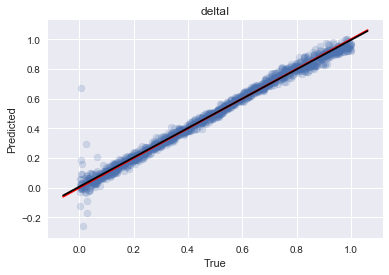

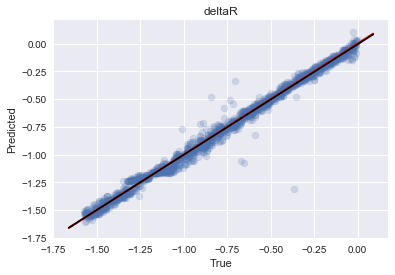

In [28]:
scaler = StandardScaler()  
scaler.fit(X_1_train)
X_1_traina = scaler.transform(X_1_train)  
X_1_testa = scaler.transform(X_1_test)
#hidden_layer_sizes=(5, 2),
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,  random_state=1)
clf = clf.fit(X_1_traina, Y_3_train)

pred_nn_1 = clf.predict(X_1_testa)

plotSummary(Y_3_test['deltaI'], pred_nn_1[:,0], 'deltaI')
plotSummary(Y_3_test['deltaR'], pred_nn_1[:,1], 'deltaR')
clf.loss_
clf.hidden_layer_sizes

print('R^2 score: ', r2_score(Y_3_test, pred_nn_1))
print('R^2 score delta I:', r2_score(Y_3_test['deltaI'], pred_nn_1[:,0]))
print('R^2 score delta R: ', r2_score(Y_3_test['deltaR'], pred_nn_1[:,1]))

In [29]:
layer1 = 20
layer2 = 20
layer3 = 10
clf2 = MLPRegressor(hidden_layer_sizes=(layer1,layer2, layer3), max_iter=10, alpha=1e-4, solver='lbfgs', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)
#Multi-layer Perceptron regressor

clf2 = clf2.fit(X_1_traina, Y_3_train)
print("Training set score: %f" % clf2.score(X_1_traina, Y_3_train))
print("Test set score: %f" % clf2.score(X_1_testa, Y_3_test))

print('Loss:', clf2.loss_)
print('Number of Iterations:', clf2.n_iter_)
print('Number of Layers:', clf2.n_layers_)
print(' ')

print('Coefficients & Intercepts:')

summary_nn1 = pd.DataFrame(clf2.coefs_[0], index = X_1_train.columns, columns = [('To Node 1-'+ str(i)) for i in range(1,layer1+1)])
summary_nn1a = pd.DataFrame(clf2.coefs_[1], index = [('Node 1-' + str(i)) for i in range(1,clf2.coefs_[1].shape[0]+1)], columns = [('To Node 2-'+ str(i)) for i in range(1,clf2.coefs_[1].shape[1]+1)])
summary_nn1b = pd.DataFrame(clf2.coefs_[2], index = [('Node 2-' + str(i)) for i in range(1,clf2.coefs_[2].shape[0]+1)], columns = [('To Node 3-'+ str(i)) for i in range(1,clf2.coefs_[2].shape[1]+1)])
summary_nn1c = pd.DataFrame(clf2.coefs_[3], index = [('Node 3-' + str(i)) for i in range(1,clf2.coefs_[3].shape[0]+1)], columns = [('To Final Node-'+ str(i)) for i in range(1,clf2.coefs_[3].shape[1]+1)])

print('Starting Layer Weights:')
print(summary_nn1)
print(' ')
print('First Hidden Layer Weights:')
print(summary_nn1a)

print(' ')
print('Second Hidden Layer Weights')
print(summary_nn1b)

print(' ')
print('Third Hidden Layer Weights')
print(summary_nn1c)

Training set score: 0.888729
Test set score: 0.891546
Loss: 0.008037038093262434
Number of Iterations: 11
Number of Layers: 5
 
Coefficients & Intercepts:
Starting Layer Weights:
          To Node 1-1  To Node 1-2  To Node 1-3  To Node 1-4  To Node 1-5  \
avgPeak     -0.074735     0.175510    -0.410074    -0.125904    -0.277443   
avgWidth     0.237819     0.338743    -0.152501     0.141969     0.304718   
avgProm      0.352213     0.196469    -0.195398     0.235206    -0.313026   
peak1       -0.310882    -0.055946     0.103358    -0.053087    -0.373432   
peak2        0.283980     0.100549     0.137038    -0.091452    -0.169988   
peak3       -0.139188     0.031537     0.248281    -0.082457     0.305716   
peak4       -0.365006    -0.346983    -0.371597    -0.171753     0.255319   
peak5        0.028601    -0.263070    -0.364173    -0.258295    -0.339316   
loc1        -0.222111     0.042310     0.038230     0.302792    -0.269951   
loc2         0.081592    -0.190136     0.186872    

In [30]:
clf2.activation
#rectified linear unit (ReLU)

'relu'

In [31]:
clf2.n_iter_

11

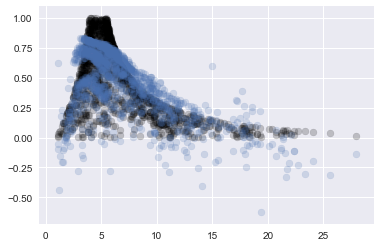

In [32]:
plt.scatter(X_1_test['avgPeak'], Y_1_test['deltaI'], color = 'black', alpha = 0.2)
plt.scatter(X_1_test['avgPeak'], y_pred1[:,0], alpha = 0.2)

In [33]:
y_pred1[:,1]



array([-0.64944494, -0.87323058, -0.32866055, ..., -1.21795146,
       -0.19352627, -1.05196735])